# Library

In [1]:
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from stargazer.stargazer import Stargazer
from scipy import stats
from scipy.stats import f
import numpy as np
from tabulate import tabulate

# Data

In [2]:
dt = pd.read_excel("C:/Users/faeri/OneDrive/Documents/Statistika/Asprak Anreg/Minggu 6/Data Bint.xlsx")
print(dt.head())

                Wilayah    PPM    IPM   RLS    PBH   PDRB    PKB
0           Sumba Barat  27.17  65.22  6.92  11.90  10199  82.84
1           Sumba Timur  28.08  67.05  7.57   5.87  16617  68.79
2                Kupang  21.78  65.82  7.42   6.17  13793  72.78
3  Timor Tengah Selatan  25.18  63.58  6.97   7.71  10953  83.83
4    Timor Tengah Utara  21.85  65.16  8.16   3.98  11511  77.65


In [3]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wilayah  22 non-null     object 
 1   PPM      22 non-null     float64
 2   IPM      22 non-null     float64
 3   RLS      22 non-null     float64
 4   PBH      22 non-null     float64
 5   PDRB     22 non-null     int64  
 6   PKB      22 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB
None


In [4]:
print(dt.describe())

             PPM        IPM        RLS        PBH          PDRB        PKB
count  22.000000  22.000000  22.000000  22.000000     22.000000  22.000000
mean   20.635000  65.706818   7.796364   5.195000  12470.772727  72.215455
std     6.764348   4.035931   1.048062   3.626019   6298.809940  17.829808
min     8.610000  58.890000   6.380000   0.760000   7706.000000   4.290000
25%    14.330000  63.620000   7.032500   1.885000   9064.250000  68.490000
50%    21.815000  65.505000   7.665000   4.020000  10797.000000  75.145000
75%    26.582500  66.772500   8.155000   7.367500  13913.750000  82.307500
max    31.780000  80.620000  11.620000  13.390000  38169.000000  93.270000


Data yang digunakan adalah data dari 22 Kabupaten/Kota di Nusa Tenggara Timur pada Tahun 2022 dengan 1 peubah respon yaitu Persentase Penduduk Miskin (PPM) dan 5 peubah penjelas. Peubah tersebut adalah Indeks Pembangunan Manusia (IPM), Rata-rata Lama Sekolah (RLS), Persentase Penduduk yang Buta Huruf (PBH), Produk Domestik Regional Bruto (PDRB), persentase penduduk yang menggunakan kayu bakar (PKB).

Untuk mempermudah dalam komputasi, karena peubah wilayah tidak digunakan, maka dapat dihapus. Pada praktikum kali ini akan dilakukan dua pemodelan, yakni model dengan seluruh peubah kuantitatif dan model dengan adanya peubah kualitatif, supaya lebih mudah dalam analisisnya maka akan dibentuk dua data berbeda.

In [5]:
dt = dt.drop(columns=['Wilayah'])

# Eksplorasi Data

## Peubah Respon

Text(0, 0.5, 'Frequency')

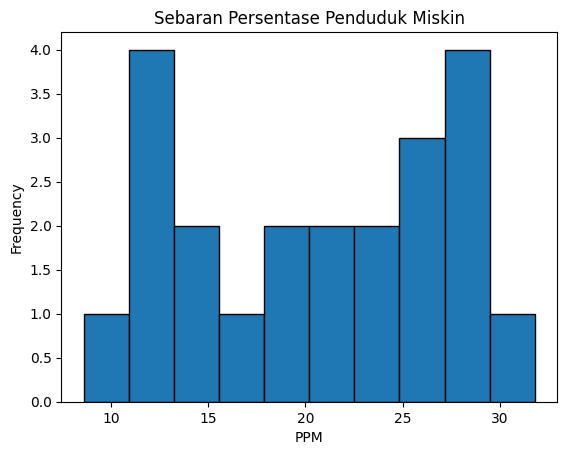

In [6]:
fig_hist, ax_hist = plt.subplots()
ax_hist.hist(dt['PPM'], bins=10, edgecolor='black')
ax_hist.set_title("Sebaran Persentase Penduduk Miskin")
ax_hist.set_xlabel("PPM")
ax_hist.set_ylabel("Frequency")

Text(0, 0.5, 'PPM')

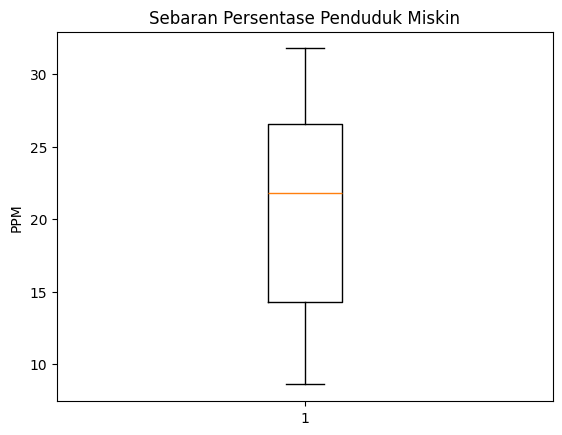

In [7]:
fig_box, ax_box = plt.subplots()
ax_box.boxplot(dt['PPM'])
ax_box.set_title("Sebaran Persentase Penduduk Miskin")
ax_box.set_ylabel("PPM")

# Peubah Penjelas vs Peubah Respon

## IPM

Text(0, 0.5, 'PPM')

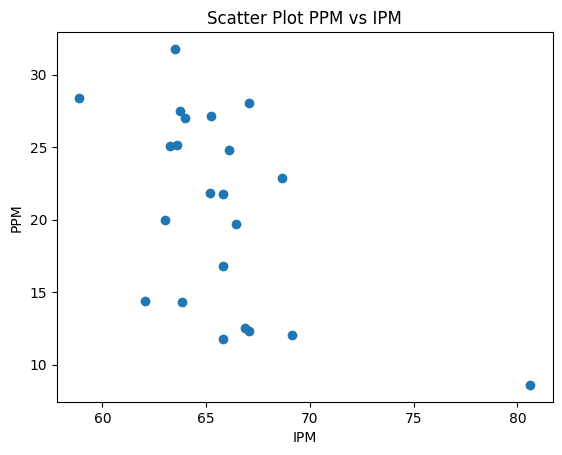

In [8]:
fig_ipm, ax_ipm = plt.subplots()
ax_ipm.scatter(dt['IPM'], dt['PPM'])
ax_ipm.set_title("Scatter Plot PPM vs IPM")
ax_ipm.set_xlabel("IPM")
ax_ipm.set_ylabel("PPM")

Hubungan antara peubah IPM dan PPM cenderung tidak linear, ada satu amatan dengan nilai X jauh dari amatan lainnya

## RLS

Text(0, 0.5, 'PPM')

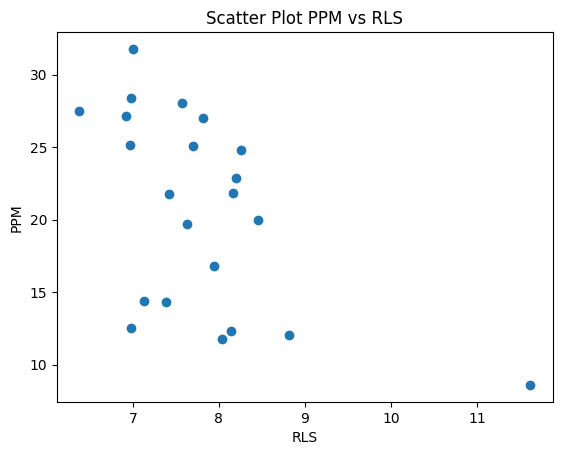

In [9]:
fig_rls, ax_rls = plt.subplots()
ax_rls.scatter(dt['RLS'], dt['PPM'])
ax_rls.set_title("Scatter Plot PPM vs RLS")
ax_rls.set_xlabel("RLS")
ax_rls.set_ylabel("PPM")

Hubungan antara peubah RLS dan PPM cenderung tidak linear, ada satu amatan dengan nilai X jauh dari amatan lainnya. Jika amatan tersebut disisihkan, hubungan linearitas akan lebih terlihat.

## TPT

Text(0, 0.5, 'PPM')

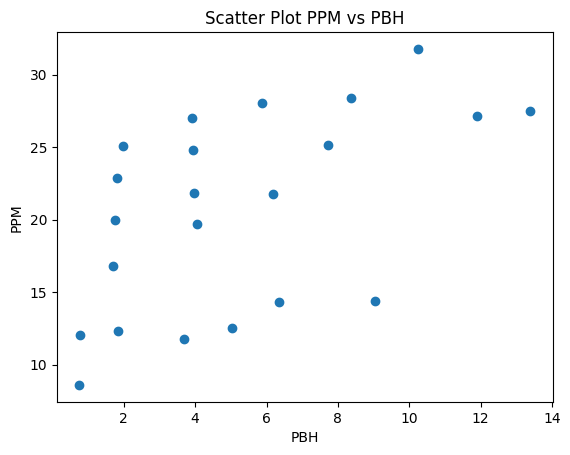

In [10]:
fig_pbh, ax_pbh = plt.subplots()
ax_pbh.scatter(dt['PBH'], dt['PPM'])
ax_pbh.set_title("Scatter Plot PPM vs PBH")
ax_pbh.set_xlabel("PBH")
ax_pbh.set_ylabel("PPM")

Hubungan linearitas tampak antara peubah PBH dan PPM, tidak ada amatan dengan nilai yang jauh dari amatan lainnya

## PDRB

Text(0, 0.5, 'PPM')

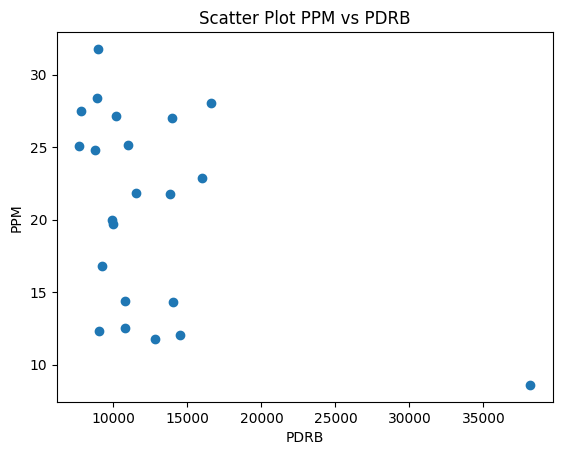

In [11]:
fig_pdrb, ax_pdrb = plt.subplots()
ax_pdrb.scatter(dt['PDRB'], dt['PPM'])
ax_pdrb.set_title("Scatter Plot PPM vs PDRB")
ax_pdrb.set_xlabel("PDRB")
ax_pdrb.set_ylabel("PPM")

Hubungan antara peubah PDRB dan PPM cenderung tidak linear, ada satu amatan dengan nilai X jauh dari amatan lainnya.

## PKB

Text(0, 0.5, 'PPM')

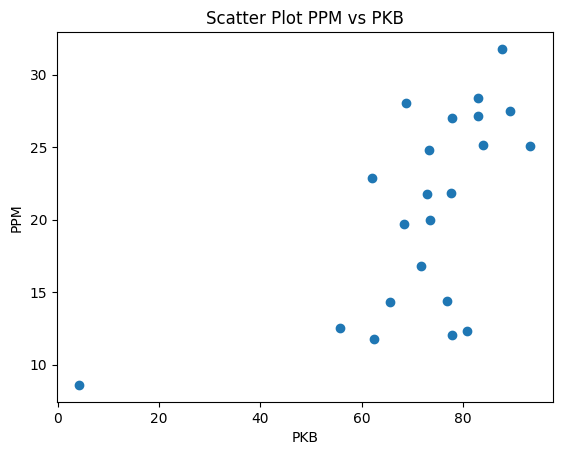

In [12]:
fig_pkb, ax_pkb = plt.subplots()
ax_pkb.scatter(dt['PKB'], dt['PPM'])
ax_pkb.set_title("Scatter Plot PPM vs PKB")
ax_pkb.set_xlabel("PKB")
ax_pkb.set_ylabel("PPM")

Hubungan antara peubah PKB dan PPM cenderung tidak linear, ada satu amatan dengan nilai X jauh dari amatan lainnya. Jika amatan tersebut disisihkan, hubungan linearitas akan lebih terlihat.

# Korelasi

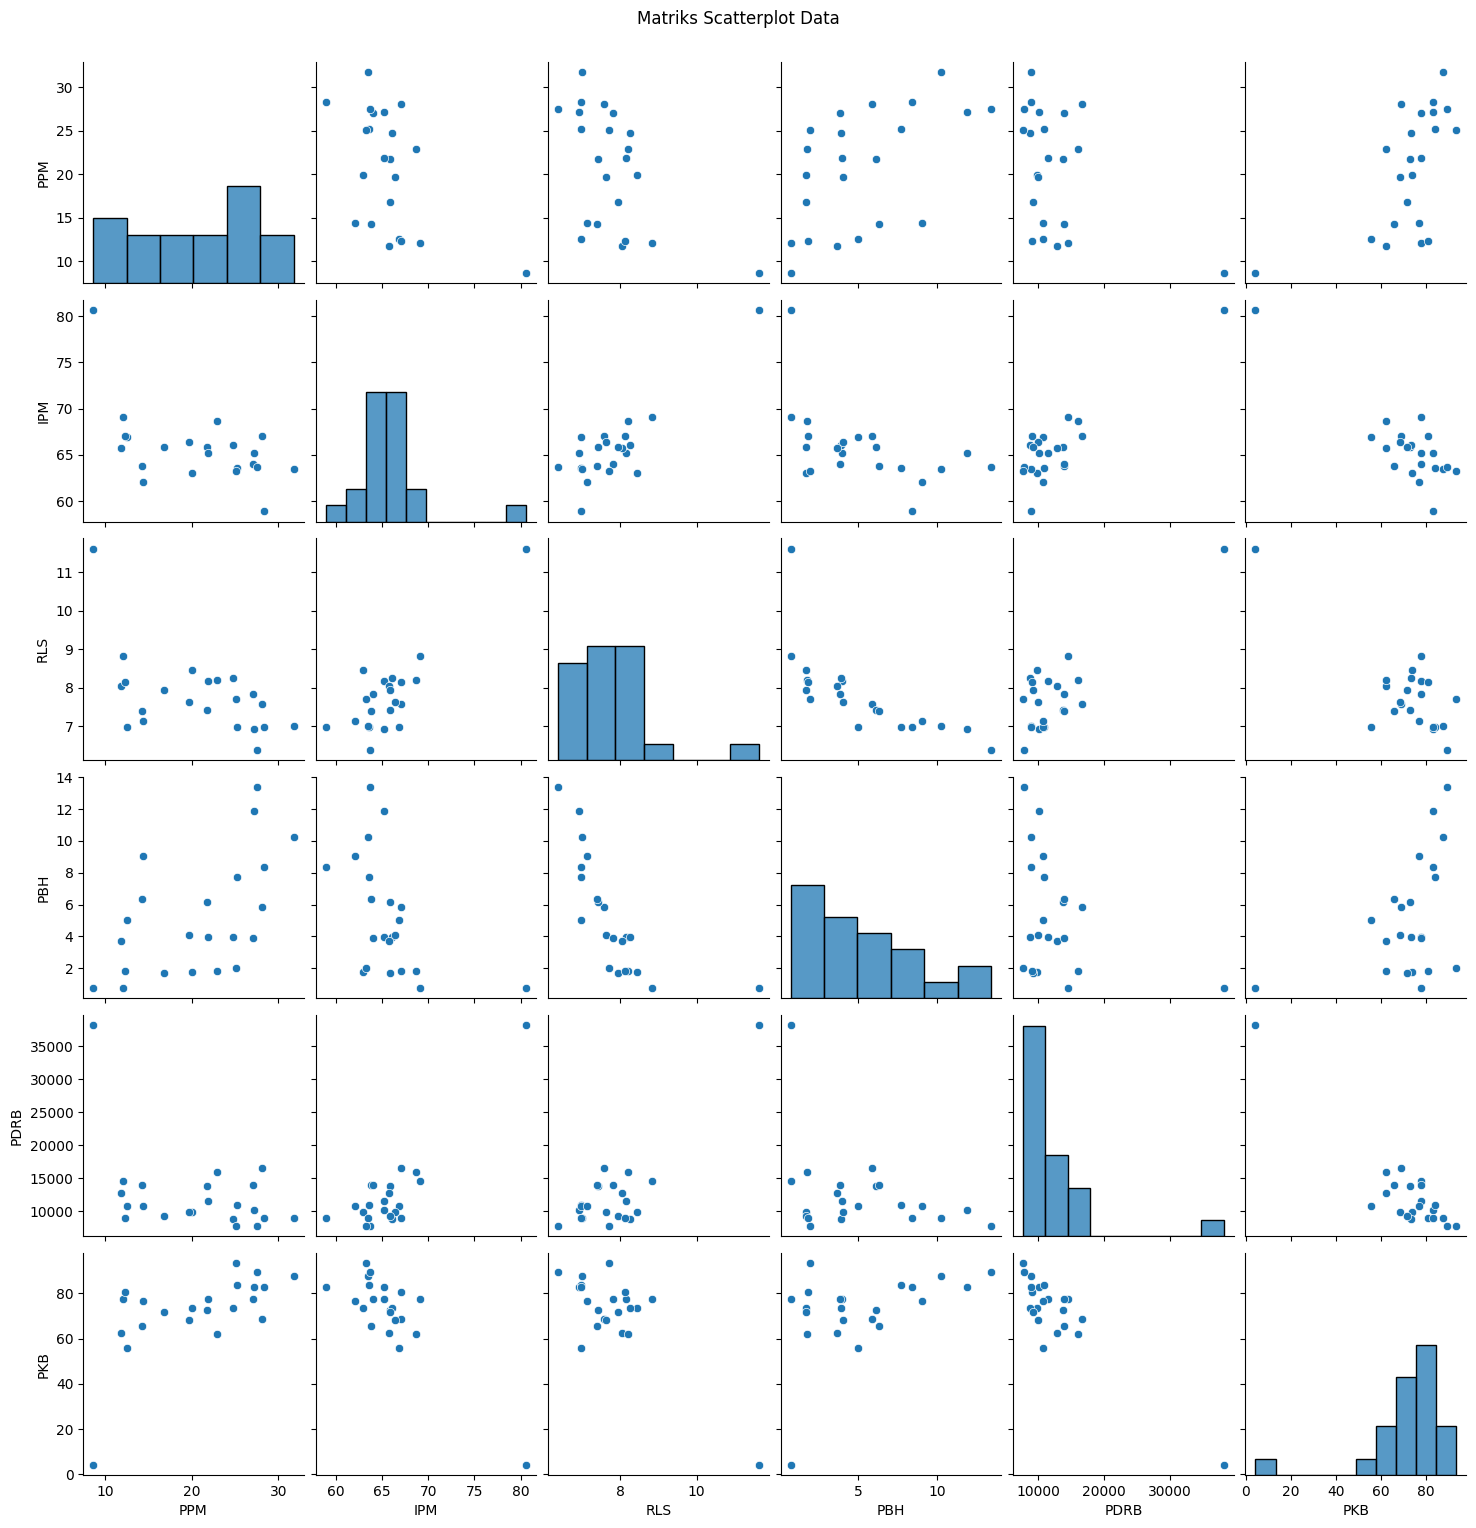

In [13]:
# Create a scatterplot matrix (pairplot)
scatter_matrix = sns.pairplot(dt)
scatter_matrix.fig.suptitle("Matriks Scatterplot Data", y=1.02)  # Adjust title position
plt.show()

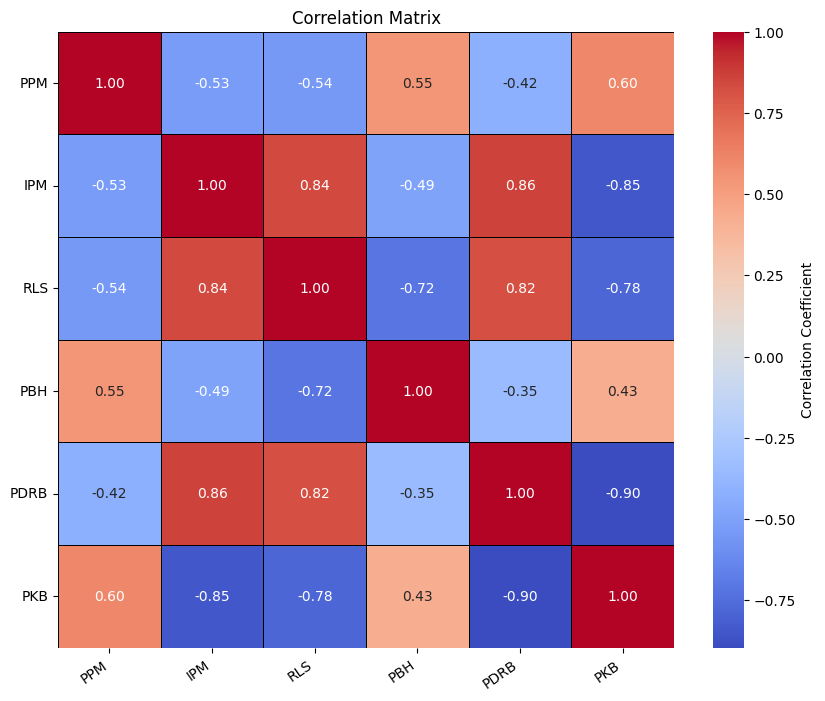

In [14]:
# Calculate the correlation matrix
cor_matrix = dt.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'},
            square=True, linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix")
plt.xticks(rotation=35, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

Hasil matriks scatter plot dan korelasi menunjukkan bahwa peubah respon PPM memiliki hubungan positif dengan PBH dan PKB, serta hubungan negatif dengan IPM, RLS, dan PDRB. Semua peubah ini secara signifikan memiliki korelasi dengan PPM.

Selain itu, terdapat korelasi tinggi antar peubah penjelas, baik lebih dari 0.5 maupun kurang dari -0.5. Beberapa di antaranya adalah:
1. RLS dan IPM memiliki korelasi 0.84.
2. PDRB dengan IPM dan RLS masing-masing sebesar 0.86 dan 0.82.
3. PKB dengan IPM dan PDRB menunjukkan korelasi negatif yang cukup kuat, yaitu -0.85 dan -0.9.

Korelasi yang tinggi ini mengindikasikan adanya potensi multikolinearitas, yang dapat mempengaruhi keakuratan model yang akan dibentuk.

# Pemodelan

In [15]:
model1 = smf.ols('PPM ~ IPM + RLS + PBH + PDRB + PKB', data=dt).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPM   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     3.545
Date:                Sat, 08 Mar 2025   Prob (F-statistic):             0.0239
Time:                        10:17:30   Log-Likelihood:                -64.560
No. Observations:                  22   AIC:                             141.1
Df Residuals:                      16   BIC:                             147.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8566     46.937      0.061      0.9

Persamaan yang terbentuk adalah

$$
\hat{PPM}=2.8566-0.2622IPM-0.1350RLS+0.5495PBH+0.0007PDRB+0.3413PKB
$$

Pada ringkasan model ini dapat dilihat bahwa secara simultan minimal ada satu peubah penjelas yang berpengaruh signifikan terhadap PPM. Hal tersebut selaras karena terdapat dugaan parameter yang signifikan pada taraf nyata 5%, yaitu peubah PKB. Peubah PDRB mengalami perubahan tanda dalam dugaan parameternya jika dibandingkan dengan arah korelasi, sehingga mengindikasi ada permasalahan dalam model. Selanjutnya diperlukan pengujian asumsi pada model, dimulai dengan pemeriksaan multikolinearitas dilanjutkan dengan diagnosis sisaan.

# Pemeriksaan Multikolinearitas

## Perubahan Peubah

In [16]:
# Membuat model regresi linier dengan incrementally menambahkan variabel
mod1 = smf.ols('PPM ~ IPM', data=dt.iloc[:, 0:3]).fit()
mod2 = smf.ols('PPM ~ IPM + RLS', data=dt.iloc[:, 0:4]).fit()
mod3 = smf.ols('PPM ~ IPM + RLS + PBH', data=dt.iloc[:, 0:5]).fit()
mod4 = smf.ols('PPM ~ IPM + RLS + PBH + PDRB', data=dt.iloc[:, 0:6]).fit()
mod5 = smf.ols('PPM ~ IPM + RLS + PBH + PDRB + PKB', data=dt).fit()
results = [mod1, mod2, mod3, mod4, mod5]

# Menyimpan koefisien ke dalam DataFrame
coef_data = {
    'Model 1': results[0].params,
    'Model 2': results[1].params,
    'Model 3': results[2].params,
    'Model 4': results[3].params,
    'Model 5': results[4].params
}

coef_df = pd.DataFrame(coef_data)

# Membuat tabel ringkasan model menggunakan tabulate
def get_model_summary(model):
    return {
        'Model': model.model.formula,
        'R-squared': model.rsquared,
        'Adj. R-squared': model.rsquared_adj,
        'F-statistic': model.fvalue,
        'Prob (F-statistic)': model.f_pvalue,
        'Log-Likelihood': model.llf,
        'AIC': model.aic,
        'BIC': model.bic
    }

summary_data = [get_model_summary(model) for model in results]
table = tabulate(summary_data, headers="keys", tablefmt="grid", floatfmt=".4f")

print(coef_df)
print(table)

             Model 1    Model 2    Model 3    Model 4   Model 5
IPM        -0.886178  -0.414471  -0.686925  -0.661515 -0.262203
Intercept  78.862960  64.707899  56.564786  54.043727  2.856573
PBH              NaN        NaN   0.780692   0.804064  0.549499
PDRB             NaN        NaN        NaN  -0.000036  0.000686
PKB              NaN        NaN        NaN        NaN  0.341280
RLS              NaN  -2.159898   0.660588   0.811129 -0.135010
+------------------------------------+-------------+------------------+---------------+----------------------+------------------+----------+----------+
| Model                              |   R-squared |   Adj. R-squared |   F-statistic |   Prob (F-statistic) |   Log-Likelihood |      AIC |      BIC |
+====================================+=============+==================+===============+======================+==================+==========+==========+
| PPM ~ IPM                          |      0.2796 |           0.2435 |        7.7609 |         

Terdapat perubahan tanda arah korelasi pada peubah RLS dan PDRB, perubahan dugaan parameter juga cukup besar ketika ditambahkan peubah lainnya. Hasil ini mengindikasi adanya permasalahan dalam model.

# Perubahan Banyak Data

In [17]:
# Membuat model regresi linier dengan subset data (baris 1 hingga 15)
mod5_1 = smf.ols('PPM ~ IPM + RLS + PBH + PDRB + PKB', data=dt.iloc[0:15]).fit()

# Mengambil koefisien dan statistik dari kedua model
results_mod5 = mod5.summary2().tables[1]
results_mod5_1 = mod5_1.summary2().tables[1]

print(results_mod5)
print(results_mod5_1)

              Coef.   Std.Err.         t     P>|t|     [0.025      0.975]
Intercept  2.856573  46.936771  0.060860  0.952224 -96.644938  102.358083
IPM       -0.262203   0.675210 -0.388329  0.702891  -1.693584    1.169177
RLS       -0.135010   3.355836 -0.040231  0.968406  -7.249064    6.979045
PBH        0.549499   0.582727  0.942979  0.359714  -0.685827    1.784824
PDRB       0.000686   0.000571  1.202910  0.246510  -0.000523    0.001896
PKB        0.341280   0.159460  2.140222  0.048088   0.003240    0.679320
              Coef.   Std.Err.         t     P>|t|      [0.025      0.975]
Intercept -1.836430  73.587062 -0.024956  0.980635 -168.301928  164.629069
IPM       -0.117825   1.018192 -0.115719  0.910416   -2.421135    2.185486
RLS       -0.415216   5.860588 -0.070849  0.945067  -13.672787   12.842355
PBH        0.518848   1.217426  0.426184  0.679985   -2.235161    3.272857
PDRB       0.000469   0.000651  0.720135  0.489721   -0.001003    0.001940
PKB        0.350783   0.254268  

c:\Users\faeri\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


Terdapat dugaan parameter yang mengalami perubahan besar ketika jumlah amatan berbeda, mengindikasi model bermasalah.

# Akar Ciri

In [18]:
x = dt.iloc[:, 1:]  # Mengambil semua kolom kecuali kolom pertama
r = x.corr()
ev = np.linalg.eigvals(r)  # Menghitung nilai eigen

print(ev)

[3.86791372 0.78926897 0.15660599 0.12986654 0.05634478]


In [19]:
# Simultan
max_ev = np.max(ev)
min_ev = np.min(ev)

if (max_ev / min_ev) <= 100:
    print("Tidak ada multikolinearitas")
elif (max_ev / min_ev) > 100 and (max_ev / min_ev) <= 1000:
    print("Ada multikolinearitas yang lemah")
else:
    print("Ada multikolinearitas yang kuat")

Tidak ada multikolinearitas


In [20]:
# Parsial
if all((max_ev / ev) <= 1000):
    print("Tidak ada multikolinearitas")
else:
    print("Ada multikolinearitas pada peubah penjelas")

Tidak ada multikolinearitas


# Nilai VIF

In [21]:
X1 = dt.drop(columns=['PPM'])  # variabel independen
y1 = dt['PPM']  # variabel dependen
X1 = sm.add_constant(X1)  # menambahkan konstanta ke model

# Menghitung Variance Inflation Factor (VIF) untuk model pertama
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X1.columns
vif_data1["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif_data1)  # menampilkan VIF untuk setiap variabel

  feature          VIF
0   const  1701.073698
1     IPM     5.473411
2     RLS     9.117351
3     PBH     3.290663
4    PDRB     9.519787
5     PKB     5.957858


Hasil pemeriksaan dengan akar ciri menyatakan tidak ada multikolinearitas pada model karena tidak ada nilai $k>100$ secara simultan. Nilai VIF juga menunjukkan tidak ada peubah yang VIF nya lebih dari 10, tetapi peubah PDRB memiliki nilai VIF yang mendekati 10 sehingga sangat berpotensi adanya hubungan linear yang kuat antara PDRB dengan peubah penjelas lainnya. Pada analisis kali ini, penanganan dilakukan dengan menghapus peubah bernilai VIF tinggi yaitu RLS karena merupakan unsur pembangun IPM.

# Pemodelan Penyisihan Perubahan

In [22]:
model2 = smf.ols('PPM ~ IPM + PBH + PDRB + PKB', data=dt).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPM   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     4.707
Date:                Sat, 08 Mar 2025   Prob (F-statistic):            0.00967
Time:                        10:17:30   Log-Likelihood:                -64.561
No. Observations:                  22   AIC:                             139.1
Df Residuals:                      17   BIC:                             144.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4478     44.458      0.055      0.9

Persamaan yang terbentuk adalah

$$
\hat{PPM}=2.4478−0.2701IPM+0.5673PBH+0.0007PDRB+0.3404PKB
$$

Pada ringkasan model ini dapat dilihat bahwa secara simultan minimal ada satu peubah penjelas yang berpengaruh signifikan terhadap PPM. Hal tersebut selaras karena terdapat dugaan parameter yang signifikan pada taraf nyata 5%, yaitu peubah PKB. Peubah PDRB mengalami perubahan tanda dalam dugaan parameternya jika dibandingkan dengan arah korelasi, sehingga mengindikasi ada permasalahan dalam model.

# VIF

In [23]:
X2 = dt[['IPM', 'PBH', 'PDRB', 'PKB']]  # variabel independen
y2 = dt['PPM']  # variabel dependen
X2 = sm.add_constant(X2)  # menambahkan konstanta ke model

# Menghitung Variance Inflation Factor (VIF) untuk model kedua
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X2.columns
vif_data2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif_data2)  # menampilkan VIF untuk setiap variabel

  feature          VIF
0   const  1621.378846
1     IPM     5.010355
2     PBH     1.388535
3    PDRB     6.682993
4     PKB     5.854468


Model hasil reduksi peubah menunjukkan bahwa nilai VIF < 10 sehingga dinyatakan tidak terjadi multikolinearitas. Namun masih ada peubah yang mengalami perubahan tanda arah korelasi. Artinya ada permasalahan lain yang mungkin belum tertangani, perlu dilakuan uji asumsi dan pemeriksaan pencilan, leverage, dan amatan berpengaruh

# Pengujian Asumsi

## Eksplorasi Grafik

### Plot Sisaan vs Yduga

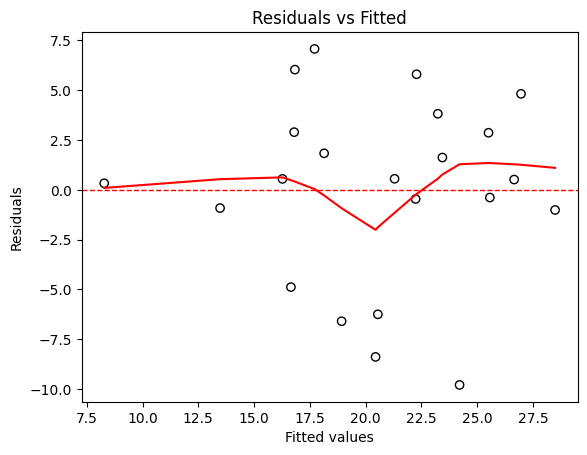

In [24]:
# Plot 1: Residuals vs Fitted
fig1, ax1 = plt.subplots()
ax1.scatter(model2.fittedvalues, model2.resid, edgecolor='k', facecolor='none')
ax1.axhline(0, linestyle='--', color='red', linewidth=1)
ax1.set_title('Residuals vs Fitted')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')

# Menambahkan garis smoothing (jika diperlukan)
smoothed = sm.nonparametric.lowess(model2.resid, model2.fittedvalues)
ax1.plot(smoothed[:, 0], smoothed[:, 1], color='red')

1. Sisaan di sekitar 0 → Nilai harapan sisaan sama dengan nol
2. Lebar pita tidak sama untuk setiap nilai dugaan → ragam sisaan tidak homogen
3. Pola plot cenderung berbentuk corong → ragam sisaan tidak homogen

### Plot sisaan vs urutan

Text(0, 0.5, 'Residuals')

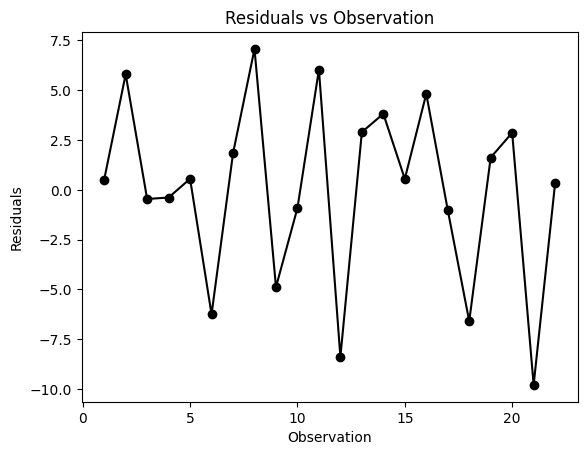

In [25]:
# Plot 2: Residuals vs Observation Number
fig2, ax2 = plt.subplots()
observation_numbers = range(1, len(dt) + 1)
ax2.plot(observation_numbers, model2.resid, marker='o', linestyle='-', color='black')
ax2.set_title('Residuals vs Observation')
ax2.set_xlabel('Observation')
ax2.set_ylabel('Residuals')

Tebaran tidak berpola → sisaan saling bebas, model pas, tetapi ada indikasi terdapat autokorelasi karena hampir menyerupai pola autokorelasi negatif

### QQ plot

Text(0, 0.5, 'Standardized Residuals')

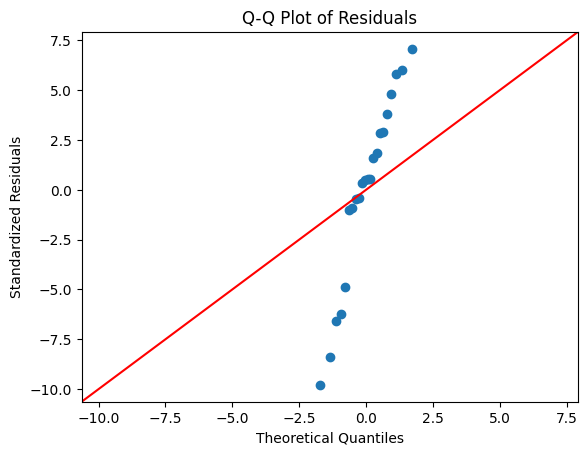

In [26]:
# Plot 3: Q-Q plot of residuals
fig3, ax3 = plt.subplots()
sm.qqplot(model2.resid, line='45', ax=ax3)
ax3.set_title('Q-Q Plot of Residuals')
ax3.set_xlabel('Theoretical Quantiles')
ax3.set_ylabel('Standardized Residuals')

Amatan cenderung tidak mengikuti garis pola sehingga sisaan tidak menyebar normal

## Uji Formal

### Nilai harapan sisaan sama dengan nol

In [27]:
t_statistic, p_value = stats.ttest_1samp(model2.resid, 0)
print(f"T-test: t-statistic = {t_statistic}, p-value = {p_value}")

T-test: t-statistic = 1.82132173652984e-12, p-value = 0.999999999998564


Nilai p pada uji t sama dengan 1 yang lebih besar dari alpha 5%, sehingga dinyatakan asumsi nilai harapan sisaan sama dengan nol terpenuhi

### Ragam sisaan homogen

In [28]:
bp_test = het_breuschpagan(model2.resid, model2.model.exog)
bp_test_results = {'Lagrange Multiplier Statistic': bp_test[0], 'p-value': bp_test[1]}
print(f"Breusch-Pagan test: {bp_test_results}")

Breusch-Pagan test: {'Lagrange Multiplier Statistic': 0.5820353624585921, 'p-value': 0.9650388940926459}


Nilai p pada uji breusch pagan sama dengan 0.965 yang lebih besar dari alpha 5%, sehingga dinyatakan asumsi ragam sisaan homogen terpenuhi

### Sisaan saling bebas

In [29]:
dw_statistic = durbin_watson(model2.resid)
print(f"Durbin-Watson test: {dw_statistic}")

Durbin-Watson test: 2.577251766185283


Nilai p pada uji durbin watson sama dengan 0.863 yang lebih besar dari alpha 5%, sehingga dinyatakan asumsi sisaan saling bebas terpenuhi

### Normalitas Sisaan

In [30]:
shapiro_statistic, shapiro_p_value = stats.shapiro(model2.resid)
print(f"Shapiro-Wilk test: statistic = {shapiro_statistic}, p-value = {shapiro_p_value}")

Shapiro-Wilk test: statistic = 0.9393414628602033, p-value = 0.1918297730361873


Nilai p pada uji shapiro wilk sama dengan 0.1918 yang lebih besar dari alpha 5%, sehingga dinyatakan asumsi normalitas sisaan terpenuhi

Semua asumsi sisaan terpenuhi, tetapi model masih buruk, kemungkinan karena keberadaan amatan yang tidak biasa seperti pencilan, leverage, atau amatan berpengaruh

## Pemeriksaan Amatan Tidak Biasa

In [31]:
residuals = model2.resid
ri_stud = model2.get_influence().resid_studentized_internal
ri_stan = model2.get_influence().resid_studentized_external
hii_fungsi = model2.get_influence().hat_matrix_diag

# Manual calculation of hat values
X = model2.model.exog  # matriks desain
X_inv_xt = np.dot(X, np.linalg.inv(np.dot(X.T, X))).dot(X.T)
hii_manual = np.diag(X_inv_xt)
anova_model = sm.stats.anova_lm(model2)
s = np.sqrt(anova_model["mean_sq"]["Residual"])
ri_manual = residuals / (s * np.sqrt(1 - hii_manual))

# Membuat DataFrame untuk menyimpan hasil
nilai = pd.DataFrame({
    'ri_stud': ri_stud,
    'ri_stan': ri_stan,
    'ri_manual': ri_manual,
    'hii_fungsi': hii_fungsi,
    'hii_manual': hii_manual
})

print(nilai)

     ri_stud   ri_stan  ri_manual  hii_fungsi  hii_manual
0   0.117764  0.114294   0.117764    0.291342    0.291342
1   1.184772  1.200007   1.184772    0.107252    0.107252
2  -0.091866 -0.089145  -0.091866    0.062279    0.062279
3  -0.079056 -0.076710  -0.079056    0.103792    0.103792
4   0.110612  0.107348   0.110612    0.067345    0.067345
5  -1.322467 -1.354549  -1.322467    0.167888    0.167888
6   0.397148  0.387091   0.397148    0.208229    0.208229
7   1.484414  1.543602   1.484414    0.154418    0.154418
8  -1.004813 -1.005116  -1.004813    0.120099    0.120099
9  -0.228397 -0.221919  -0.228397    0.400113    0.400113
10  1.222041  1.241330   1.222041    0.091973    0.091973
11 -1.976337 -2.184657  -1.976337    0.328877    0.328877
12  0.607104  0.595468   0.607104    0.153263    0.153263
13  0.824060  0.815918   0.824060    0.200717    0.200717
14  0.115541  0.112135   0.115541    0.163583    0.163583
15  1.016735  1.017809   1.016735    0.163634    0.163634
16 -0.246396 -

## Pencilan

In [32]:
# Menghitung studentized residuals
studentized_residuals = model2.get_influence().resid_studentized_internal

# Menentukan threshold untuk outliers
outlier_threshold = 2

# Menemukan outliers
outliers = np.where(np.abs(studentized_residuals) > outlier_threshold)[0] + 1  # +1 for 1-based index

# Menampilkan hasil
print("Nomor data amatan yang merupakan outliers:", outliers)

Nomor data amatan yang merupakan outliers: [21]


## Leverage

In [33]:
# Menghitung hat values (leverage)
leverage = model2.get_influence().hat_matrix_diag

# Menentukan threshold untuk leverage
leverage_threshold = 2 * (X2.shape[1] / len(dt))

# Menemukan leverage points
leverage_points = np.where(leverage > leverage_threshold)[0] + 1  # +1 for 1-based index

# Menampilkan hasil
print("Nomor data amatan yang merupakan leverage points:", leverage_points)

Nomor data amatan yang merupakan leverage points: [22]


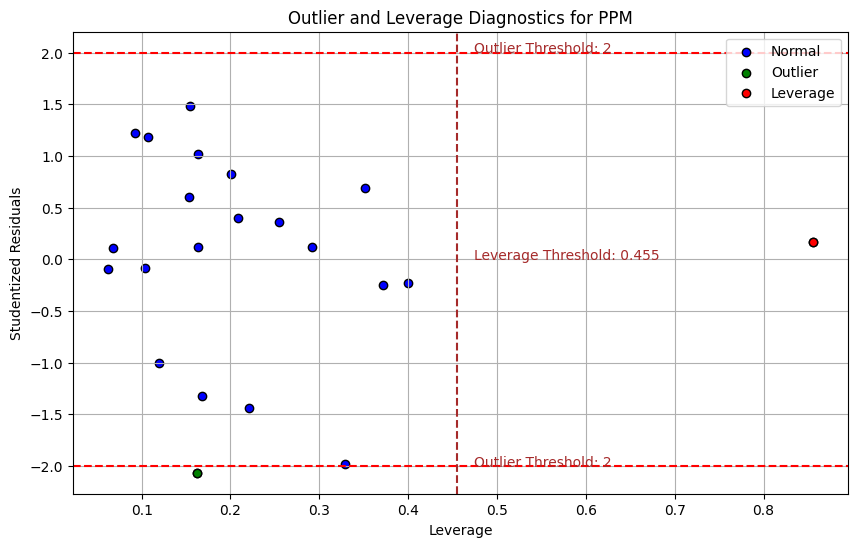

In [34]:
# Menghitung studentized residuals dan hat values
studentized_residuals = model2.get_influence().resid_studentized_internal
leverage = model2.get_influence().hat_matrix_diag

# Menghitung threshold
n = len(dt)
p = len(model2.params)
leverage_threshold = 2 * (p / n)
outlier_threshold = 2

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(leverage, studentized_residuals, color='blue', label='Normal', edgecolor='k')

# Menandai outliers
outliers = np.abs(studentized_residuals) > outlier_threshold
plt.scatter(leverage[outliers], studentized_residuals[outliers], color='green', label='Outlier', edgecolor='k')

# Menandai leverage points
high_leverage = leverage > leverage_threshold
plt.scatter(leverage[high_leverage], studentized_residuals[high_leverage], color='red', label='Leverage', edgecolor='k')

# Garis threshold
plt.axhline(y=outlier_threshold, color='red', linestyle='--')
plt.axhline(y=-outlier_threshold, color='red', linestyle='--')
plt.axvline(x=leverage_threshold, color='brown', linestyle='--')

# Menambahkan teks threshold
plt.text(leverage_threshold + 0.02, outlier_threshold, f'Outlier Threshold: {outlier_threshold}', color='brown')
plt.text(leverage_threshold + 0.02, -outlier_threshold, f'Outlier Threshold: {outlier_threshold}', color='brown')
plt.text(leverage_threshold + 0.02, 0, f'Leverage Threshold: {leverage_threshold:.3f}', color='brown')

# Labeling
plt.title('Outlier and Leverage Diagnostics for PPM')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.legend()
plt.grid()
plt.show()

## Amatan Berpengaruh

### Jarak Cook

In [35]:
# Menghitung Cook's Distance
influence = model2.get_influence()
cooks_d = influence.cooks_distance[0]

# Menghitung nilai kritis untuk Cook's Distance
n = len(dt)  # jumlah observasi
p = len(model2.params)  # jumlah parameter
cooks_crit = f.ppf(0.95, p, n - p)  # nilai kritis

# Membuat DataFrame untuk plot
df = pd.DataFrame({'obs': range(1, n + 1), 'cooks': cooks_d, 'di>f': cooks_d>cooks_crit})
print(df)

    obs     cooks   di>f
0     1  0.001140  False
1     2  0.033727  False
2     3  0.000112  False
3     4  0.000145  False
4     5  0.000177  False
5     6  0.070573  False
6     7  0.008296  False
7     8  0.080479  False
8     9  0.027562  False
9    10  0.006959  False
10   11  0.030253  False
11   12  0.382811  False
12   13  0.013343  False
13   14  0.034106  False
14   15  0.000522  False
15   16  0.040451  False
16   17  0.007171  False
17   18  0.117841  False
18   19  0.008988  False
19   20  0.050935  False
20   21  0.164718  False
21   22  0.032683  False


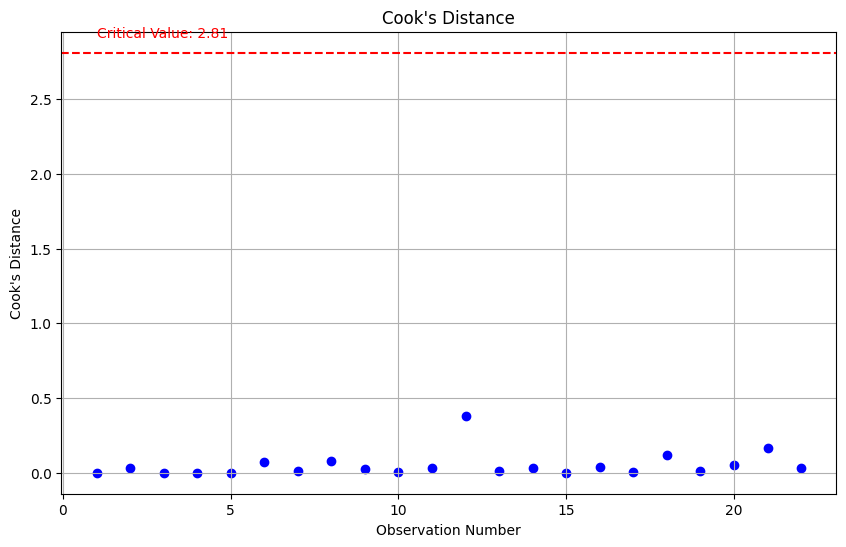

In [36]:
# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.scatter(df['obs'], df['cooks'], color='blue')
plt.axhline(y=cooks_crit, color='red', linestyle='--')
plt.title("Cook's Distance")
plt.xlabel("Observation Number")
plt.ylabel("Cook's Distance")
plt.text(1, cooks_crit + 0.1, f'Critical Value: {cooks_crit:.2f}', color='red')
plt.grid()
plt.show()

Pemeriksaan amatan berpengaruh dengan jarak cook tidak dihasilkan nilai yang melebihi ambang batas

### DFBETAS

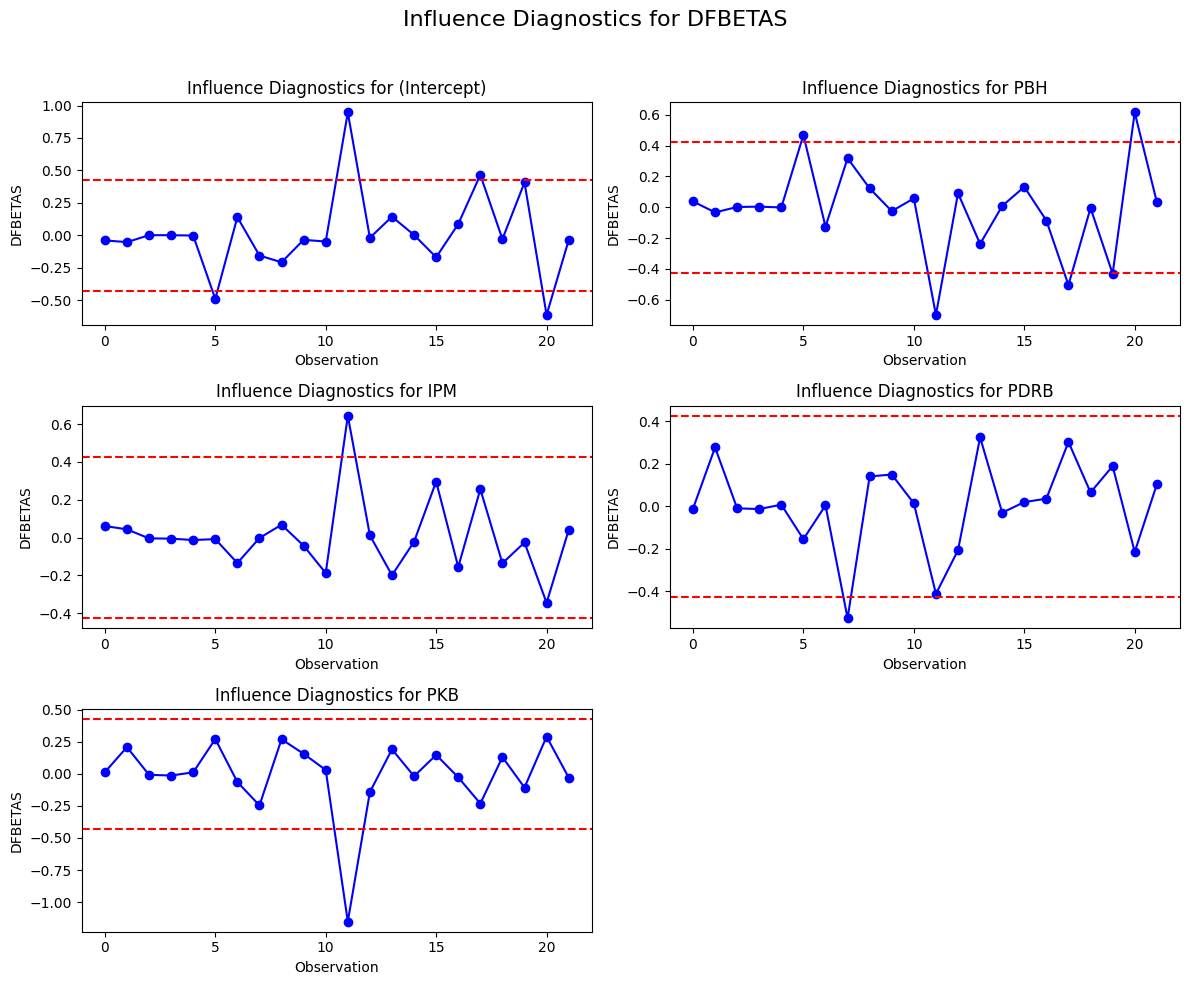

In [37]:
# Menghitung DFBETAS
influence = model2.get_influence()
dfbetas = influence.dfbetas

# Menentukan threshold
n = len(dt)
p = len(model2.params)
threshold = 2 / np.sqrt(n)

# Membuat plot untuk setiap variabel
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Influence Diagnostics for DFBETAS', fontsize=16)

# Plot untuk Intercept
axs[0, 0].plot(dfbetas[:, 0], marker='o', linestyle='-', color='blue')
axs[0, 0].axhline(y=threshold, color='red', linestyle='--')
axs[0, 0].axhline(y=-threshold, color='red', linestyle='--')
axs[0, 0].set_title('Influence Diagnostics for (Intercept)')
axs[0, 0].set_xlabel('Observation')
axs[0, 0].set_ylabel('DFBETAS')

# Plot untuk PBH
axs[0, 1].plot(dfbetas[:, 1], marker='o', linestyle='-', color='blue')
axs[0, 1].axhline(y=threshold, color='red', linestyle='--')
axs[0, 1].axhline(y=-threshold, color='red', linestyle='--')
axs[0, 1].set_title('Influence Diagnostics for PBH')
axs[0, 1].set_xlabel('Observation')
axs[0, 1].set_ylabel('DFBETAS')

# Plot untuk IPM
axs[1, 0].plot(dfbetas[:, 2], marker='o', linestyle='-', color='blue')
axs[1, 0].axhline(y=threshold, color='red', linestyle='--')
axs[1, 0].axhline(y=-threshold, color='red', linestyle='--')
axs[1, 0].set_title('Influence Diagnostics for IPM')
axs[1, 0].set_xlabel('Observation')
axs[1, 0].set_ylabel('DFBETAS')

# Plot untuk PDRB
axs[1, 1].plot(dfbetas[:, 3], marker='o', linestyle='-', color='blue')
axs[1, 1].axhline(y=threshold, color='red', linestyle='--')
axs[1, 1].axhline(y=-threshold, color='red', linestyle='--')
axs[1, 1].set_title('Influence Diagnostics for PDRB')
axs[1, 1].set_xlabel('Observation')
axs[1, 1].set_ylabel('DFBETAS')

# Plot untuk PKB
axs[2, 0].plot(dfbetas[:, 4], marker='o', linestyle='-', color='blue')
axs[2, 0].axhline(y=threshold, color='red', linestyle='--')
axs[2, 0].axhline(y=-threshold, color='red', linestyle='--')
axs[2, 0].set_title('Influence Diagnostics for PKB')
axs[2, 0].set_xlabel('Observation')
axs[2, 0].set_ylabel('DFBETAS')

# Menghapus subplot kosong
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Hasil DFBETAS akan menunjukkan pengaruh observasi terhadap setiap koefisien regresi, sehingga ada output untuk setiap parameter regresi. DFBETAS mengukur seberapa besar koefisien regresi berubah jika suatu observasi dihapus dari model.

### DFFITS

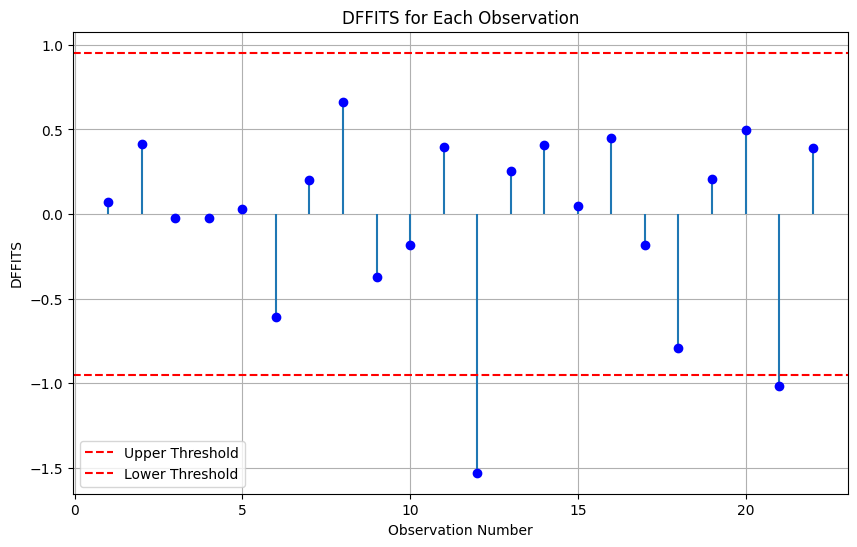

In [38]:
# Menghitung DFFITS
influence = model2.get_influence()
dffits = influence.dffits[0]

# Menghitung threshold
n = len(dt)  # jumlah observasi
p = len(model2.params)  # jumlah parameter
threshold = 2 * np.sqrt(p / n)

# Plot DFFITS
plt.figure(figsize=(10, 6))
plt.stem(range(1, n + 1), dffits, markerfmt='bo', basefmt=" ")
plt.axhline(threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(-threshold, color='red', linestyle='--', label='Lower Threshold')
plt.title("DFFITS for Each Observation")
plt.xlabel("Observation Number")
plt.ylabel("DFFITS")
plt.legend()
plt.grid()
plt.show()

Hasil DFFITS menunjukkan pengaruh observasi terhadap nilai prediksi Y, sehingga hanya menghasilkan satu output. DFFITS mengukur seberapa besar nilai prediksi $\hat{Y_i}$ berubah jika suatu observasi dihapus dari model, sehingga lebih tepat digunakan jika ingin melihat pengaruh observasi terhadap hasil model secara keseluruhan

## Pemodelan Penyisihan Amatan

In [41]:
# Membuat model-model dengan menghapus observasi tertentu
models = {}
model2 = sm.OLS(dt['PPM'], sm.add_constant(dt[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 2'] = model2

# gunakan peubah penjelas yang sudah diseleksi

dt1 = dt.drop(index=11)
model3 = sm.OLS(dt1['PPM'], sm.add_constant(dt1[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 3'] = model3

dt2 = dt.drop(index=20)
model4 = sm.OLS(dt2['PPM'], sm.add_constant(dt2[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 4'] = model4

dt3 = dt.drop(index=21)
model5 = sm.OLS(dt3['PPM'], sm.add_constant(dt3[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 5'] = model5

dt4 = dt.drop(index=[11, 20])
model6 = sm.OLS(dt4['PPM'], sm.add_constant(dt4[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 6'] = model6

dt5 = dt.drop(index=[11, 21])
model7 = sm.OLS(dt5['PPM'], sm.add_constant(dt5[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 7'] = model7

dt6 = dt.drop(index=[20, 21])
model8 = sm.OLS(dt6['PPM'], sm.add_constant(dt6[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 8'] = model8

dt6 = dt.drop(index=[11, 20, 21])
model9 = sm.OLS(dt6['PPM'], sm.add_constant(dt6[['IPM', 'PBH', 'PDRB', 'PKB']])).fit()
models['Model 9'] = model9

In [42]:
# Fungsi untuk mendapatkan metrik model
def get_metrics(model):
    adj_r2 = model.rsquared_adj
    sse = sum(model.resid**2)
    return adj_r2, sse

# Menghitung metrik untuk setiap model
model_metrics = pd.DataFrame({
    'Model': list(models.keys()),
    'Adjusted_R2': [get_metrics(m)[0] for m in models.values()],
    'SSE': [get_metrics(m)[1] for m in models.values()]
})

print(model_metrics)

     Model  Adjusted_R2         SSE
0  Model 2     0.413876  455.921307
1  Model 3     0.503354  351.169198
2  Model 4     0.536141  341.555436
3  Model 5     0.297040  455.179777
4  Model 6     0.602506  262.908030
5  Model 7     0.389826  347.575060
6  Model 8     0.433719  340.226004
7  Model 9     0.495837  261.267258


Berdasarkan hasil perbandingan tersebut, didapatkan bahwa model 4 yang menyisihkan amatan ke-21 memiliki nilai adjusted R square terbesar tetapi bukan SSE yang terkecil. SSE terkecil terdapat pada model 9 yang menyisihkan amatan ke-12, 21, dan 22